# Micro-Credit-Project

The principle of micro-credit is to offer small loans to entrepreneurs and artisans who do not have access to traditional bank loans.
With these micro-loans, they are able to execute micro-projects, thus providing employment and assisting local economic development.

In [1]:
#Importing important lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
#Loading dataset
data=pd.read_csv("Data File.csv")
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
#Column Names
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
#Number rows and columns
data.shape

(209593, 37)

In [5]:
#Dropping unimportant fields
data=data.drop(columns=['Unnamed: 0'])

In [6]:
#Describing the dataset
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [7]:
#Info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
#Check Missing Values
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
#checking unique Values
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [10]:
#Dropping pcircle since value is same
data=data.drop(columns=['pcircle'])

In [11]:
#Applying label encoder to convert it into the machine-readable form
data=data.apply(LabelEncoder().fit_transform)
data.corr()

label    msisdn       aon  daily_decr30  \
label                 1.000000  0.001976  0.066149      0.261715   
msisdn                0.001976  1.000000 -0.002341     -0.001788   
aon                   0.066149 -0.002341  1.000000      0.078593   
daily_decr30          0.261715 -0.001788  0.078593      1.000000   
daily_decr90          0.262401 -0.001518  0.078766      0.995230   
rental30              0.096589 -0.002252  0.057727      0.598928   
rental90              0.111226 -0.001800  0.063710      0.655943   
last_rech_date_ma    -0.014236 -0.000709  0.003947     -0.006978   
last_rech_date_da     0.004965  0.000582  0.000035      0.009567   
last_rech_amt_ma      0.169902 -0.001328  0.081073      0.304006   
cnt_ma_rech30         0.239192  0.000960 -0.004206      0.440957   
fr_ma_rech30          0.019279 -0.002464  0.007570      0.016722   
sumamnt_ma_rech30     0.186063  0.002633  0.035528      0.471294   
medianamnt_ma_rech30  0.132773  0.000782  0.083262      0.277373   
medianmarechprebal30  0.206274  0.001274  0.027131      0.203869   
cnt_ma_rech90         0.238164 -0.001595  0.013273      0.570858   
fr_ma_rech90          0.084385 -0.004413  0.029914     -0.016440   
sumamnt_ma_rech90     0.216044 -0.000006  0.058197      0.633893   
medianamnt_ma_rech90  0.114257 -0.000607  0.090669      0.245677   
medianmarechprebal90  0.200516  0.000088  0.025674      0.167870   
cnt_da_rech30         0.003888 -0.001678  0.000961      0.003703   
fr_da_rech30         -0.000744 -0.000058 -0.000096     -0.001547   
cnt_da_rech90         0.003127  0.004751  0.009636      0.057183   
fr_da_rech90         -0.005784 -0.002343  0.009753      0.032576   
cnt_loans30           0.196413  0.001768  0.027602      0.363555   
amnt_loans30          0.197373  0.002194  0.029307      0.425962   
maxamnt_loans30       0.000810 -0.000731 -0.002758      0.000213   
medianamnt_loans30    0.044595  0.000992  0.002027      0.003262   
cnt_loans90           0.018315  0.001659  0.007184      0.042034   
amnt_loans90          0.199860 -0.000151  0.052344      0.528678   
maxamnt_loans90       0.084144  0.003286  0.031109      0.385333   
medianamnt_loans90    0.035750  0.001217 -0.003147     -0.032849   
payback30             0.168042  0.004974  0.028020      0.255387   
payback90             0.175943  0.004029  0.047754      0.324527   
pdate                 0.162687 -0.002085  0.063868      0.817257   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
label                     0.262401  0.096589  0.111226          -0.014236   
msisdn                   -0.001518 -0.002252 -0.001800          -0.000709   
aon                       0.078766  0.057727  0.063710           0.003947   
daily_decr30              0.995230  0.598928  0.655943          -0.006978   
daily_decr90              1.000000  0.602328  0.665595          -0.006521   
rental30                  0.602328  1.000000  0.970263          -0.011588   
rental90                  0.665595  0.970263  1.000000          -0.006947   
last_rech_date_ma        -0.006521 -0.011588 -0.006947           1.000000   
last_rech_date_da         0.009444  0.006177  0.006682           0.003732   
last_rech_amt_ma          0.305934  0.156899  0.157903           0.044562   
cnt_ma_rech30             0.442380  0.357525  0.347728          -0.042622   
fr_ma_rech30              0.016409  0.010212  0.011506          -0.005670   
sumamnt_ma_rech30         0.479722  0.350136  0.333753          -0.026567   
medianamnt_ma_rech30      0.279380  0.134974  0.129146           0.007068   
medianmarechprebal30      0.202608  0.105207  0.106722          -0.014818   
cnt_ma_rech90             0.588113  0.430051  0.459917          -0.029118   
fr_ma_rech90             -0.024510 -0.034426 -0.034962           0.001881   
sumamnt_ma_rech90         0.658319  0.441293  0.465499          -0.020100   
medianamnt_ma_rech90      0.249558  0.102299  0.101076           0.038798   
medianmarechprebal90      0.167651  

# DATA VISUALIZATION 

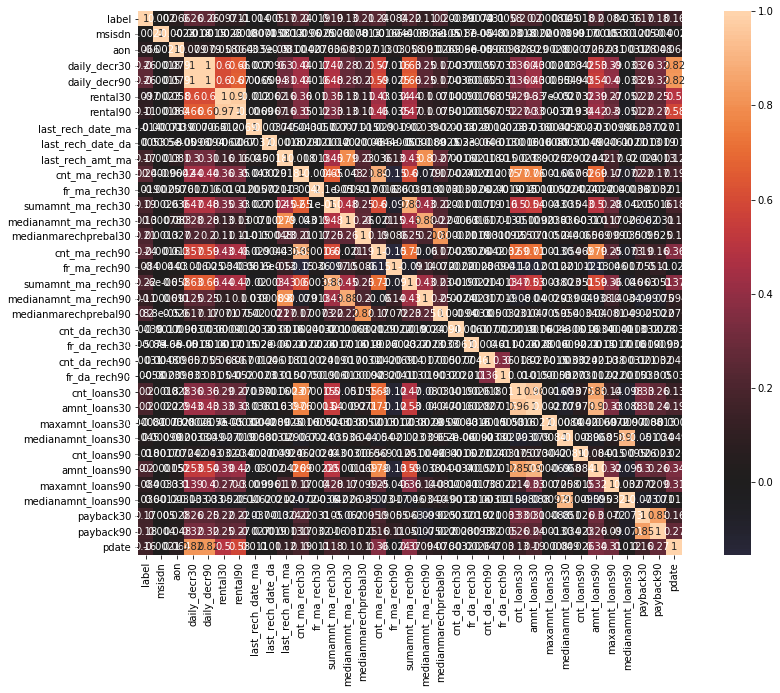

In [12]:
#Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,square=True,center=0)
plt.show()

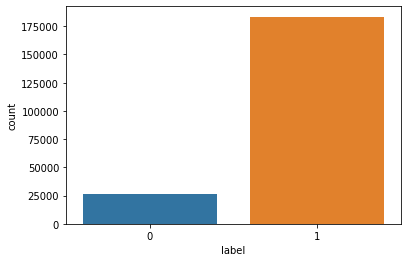

In [13]:
#countplot
sns.countplot(data['label'])

<Figure size 720x432 with 0 Axes>

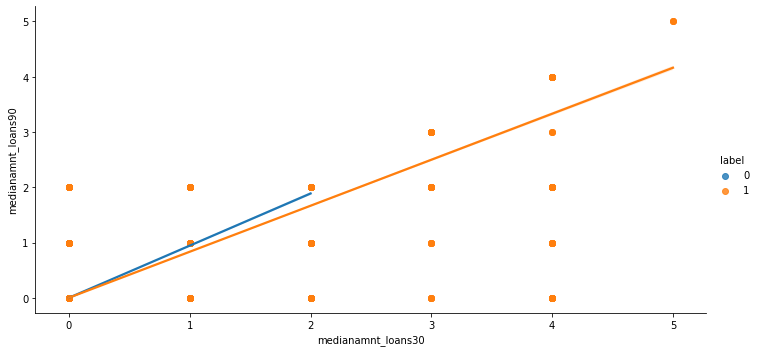

In [14]:
#lmplot
plt.figure(figsize=(10,6))
sns.lmplot(x='medianamnt_loans30',y='medianamnt_loans90',data=data,hue='label',size=5,aspect=2)

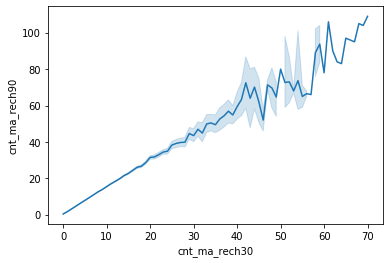

In [15]:
#Lineplot
sns.lineplot(x="cnt_ma_rech30",y="cnt_ma_rech90",data=data)
plt.show()

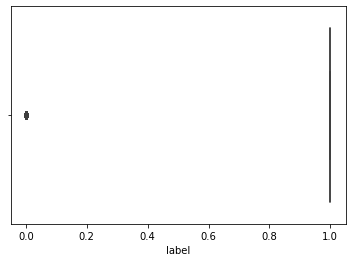

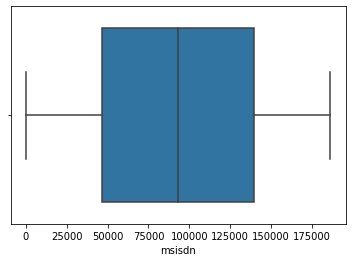

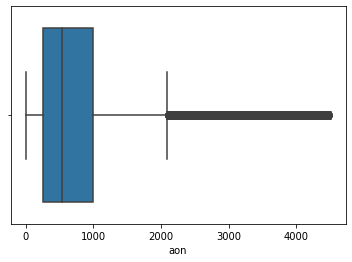

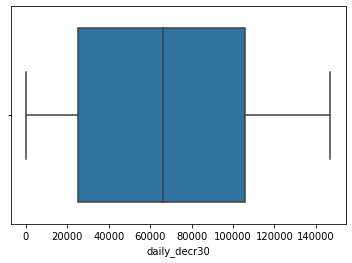

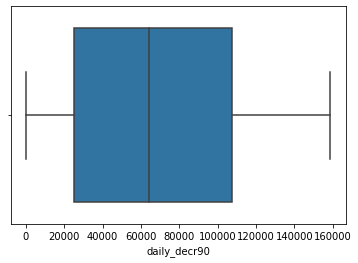

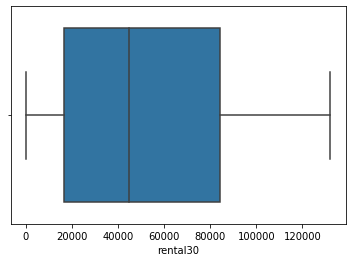

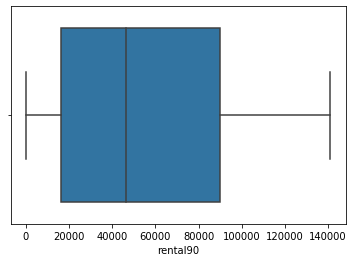

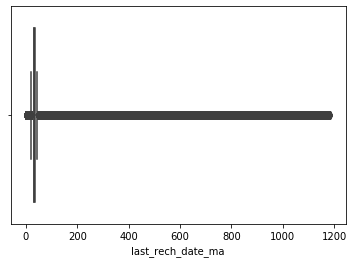

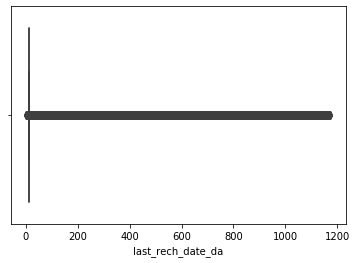

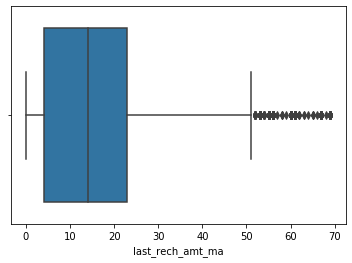

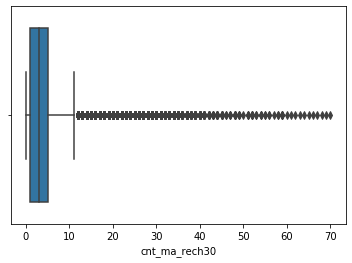

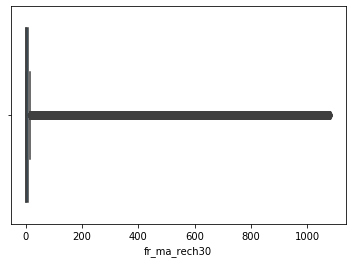

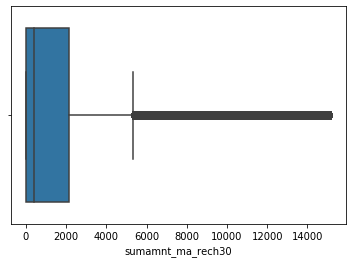

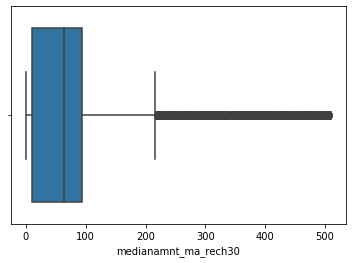

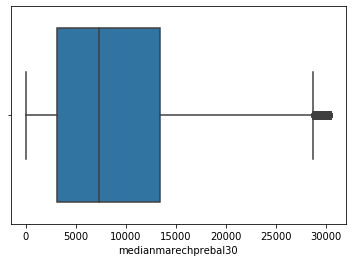

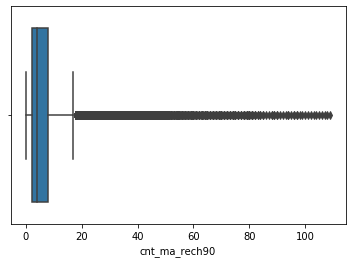

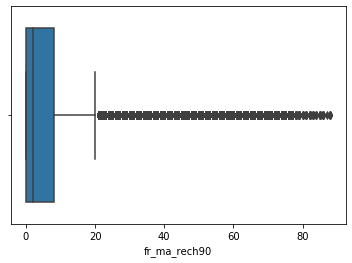

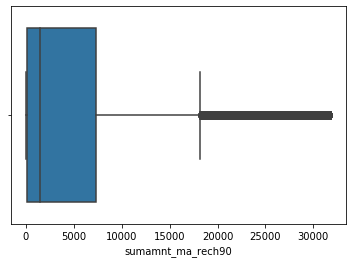

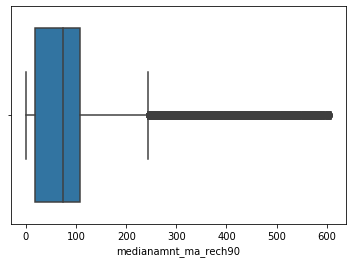

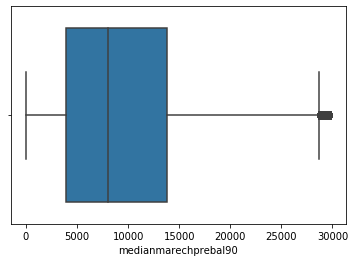

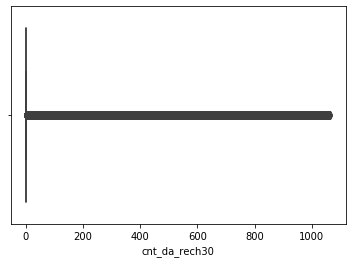

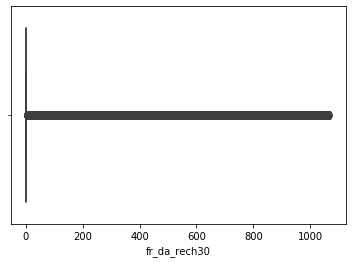

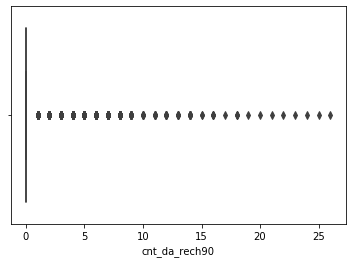

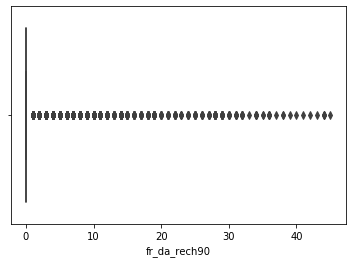

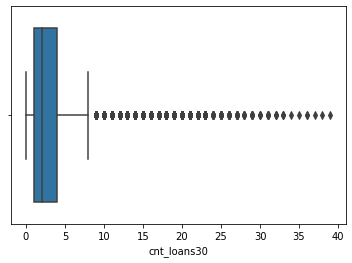

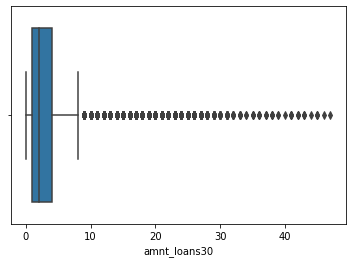

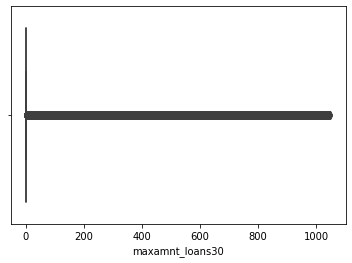

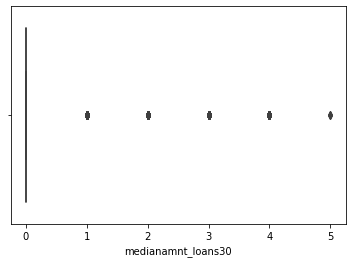

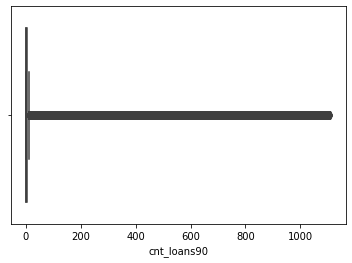

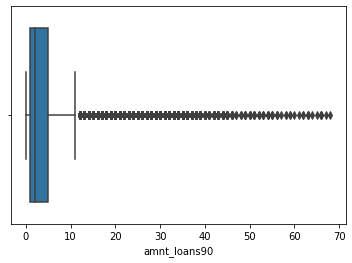

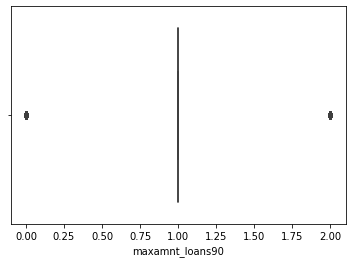

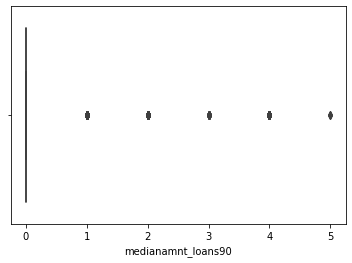

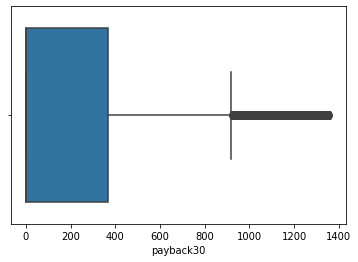

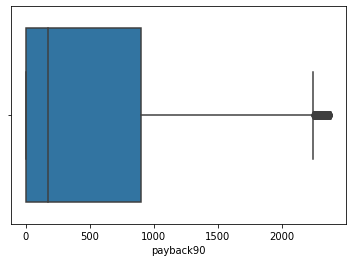

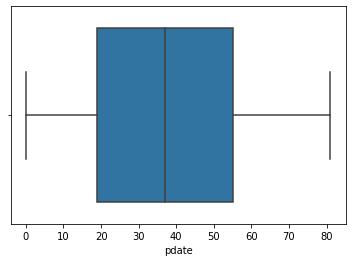

In [16]:
for i in data.describe().columns:
    sns.boxplot(data[i].dropna())
    plt.show()

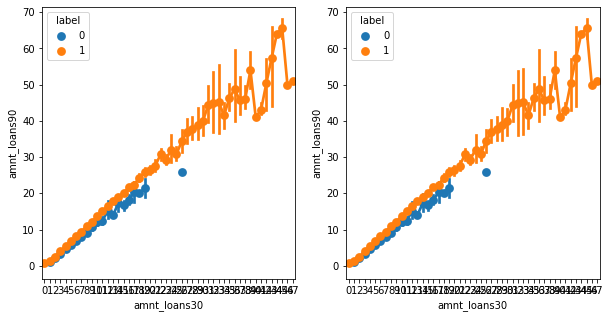

In [17]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='amnt_loans30', y='amnt_loans90', hue='label', data=data, ax=axis1)
sns.pointplot(x='amnt_loans30', y='amnt_loans90', hue='label', data=data, ax=axis2)

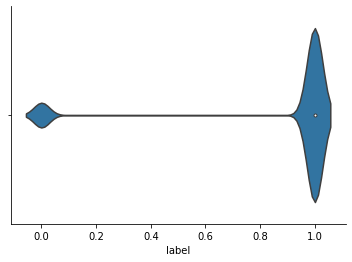

In [18]:
#ViolinPlot
sns.violinplot(x='label',data=data)
sns.despine()

Text(0.5, 1.0, 'Micro-Credit-Project')

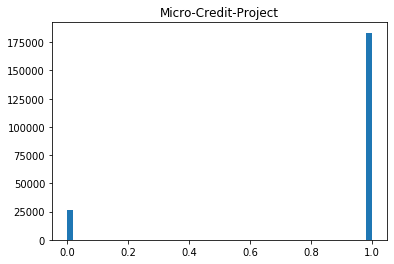

In [19]:
#Histogram
plt.hist(x='label',data=data,bins=50)
plt.title("Micro-Credit-Project")

# Data Preprocessing

In [20]:
y=data['label']
x =data.drop(['label'], axis=1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lr.predict(x_test)
f1_LR=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",lr.score(x_train, y_train))
print("Testing Accuracy: ", lr.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.8793715707323723
Testing Accuracy:  0.8783994401857566
[[  476  7425]
 [  221 54756]]
              precision    recall  f1-score   support

           0       0.68      0.06      0.11      7901
           1       0.88      1.00      0.93     54977

    accuracy                           0.88     62878
   macro avg       0.78      0.53      0.52     62878
weighted avg       0.86      0.88      0.83     62878



In [24]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred = knn.predict(x_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",knn.score(x_train, y_train))
print("Testing Accuracy: ",knn.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.914998466414477
Testing Accuracy:  0.8920926238111899
[[ 2983  4918]
 [ 1867 53110]]
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      7901
           1       0.92      0.97      0.94     54977

    accuracy                           0.89     62878
   macro avg       0.77      0.67      0.70     62878
weighted avg       0.88      0.89      0.88     62878



In [26]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
y_pred = dtc.predict(x_test)
f1_DT=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",dtc.score(x_train, y_train))
print("Testing Accuracy: ", dtc.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9999795521930273
Testing Accuracy:  0.8852221762778715
[[ 4331  3570]
 [ 3647 51330]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      7901
           1       0.93      0.93      0.93     54977

    accuracy                           0.89     62878
   macro avg       0.74      0.74      0.74     62878
weighted avg       0.89      0.89      0.89     62878



In [28]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred = NB.predict(x_test)
print("Training Accuracy: ",NB.score(x_train, y_train))
print("Testing Accuracy: ", NB.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.6327028592850084
Testing Accuracy:  0.6279302776805878
[[ 6589  1312]
 [22083 32894]]
              precision    recall  f1-score   support

           0       0.23      0.83      0.36      7901
           1       0.96      0.60      0.74     54977

    accuracy                           0.63     62878
   macro avg       0.60      0.72      0.55     62878
weighted avg       0.87      0.63      0.69     62878



In [30]:
rfc = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = rfc.predict(x_test)
f1_RF=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",rfc.score(x_train, y_train))
print("Testing Accuracy: ", rfc.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9985686535119108
Testing Accuracy:  0.9205127389548013
[[ 4122  3779]
 [ 1219 53758]]
              precision    recall  f1-score   support

           0       0.77      0.52      0.62      7901
           1       0.93      0.98      0.96     54977

    accuracy                           0.92     62878
   macro avg       0.85      0.75      0.79     62878
weighted avg       0.91      0.92      0.91     62878



In [32]:
models=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier' ]
fig = go.Figure(data=[
    go.Bar(name='f1_score', x=models, y=[f1_LR,f1_DT,f1_RF,f1_KNN])])
fig.show()

# CONCLUSION:
According to Comparison of Classifiers section Random Forest Classifier is the best option for this test data.

As above Random Forest fits best for dataset out of all our tested models

In [33]:
final_Model = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
final_Model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

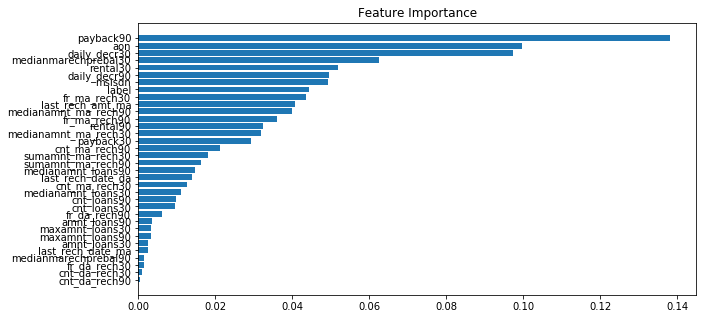

In [34]:
importances = final_Model.feature_importances_
indices = np.argsort(importances)[::1]

names = [data.columns[i] for i in indices]

fig = plt.figure(figsize=(10,5))
plt.title("Feature Importance")

plt.barh(range(x.shape[1]),importances[indices],align = 'center')
plt.yticks(range(x.shape[1]), names)
plt.show()

In [35]:
Churn_Pred = final_Model.predict(x)
cm = pd.crosstab(y,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0      0       1
label               
0      22203    3959
1       1249  182182

Accuracy :-  97.52
False Negative Rate :-  0.68
False Postive Rate :-  15.13


In [36]:
print(classification_report(y,Churn_Pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     26162
           1       0.98      0.99      0.99    183431

    accuracy                           0.98    209593
   macro avg       0.96      0.92      0.94    209593
weighted avg       0.97      0.98      0.97    209593



In [37]:
from sklearn.externals import joblib
joblib.dump(final_Model,'Data File.obj')

['Data File.obj']